# Flexibility needs: Power (ramps)

In [1]:
import numpy as np
import pandas as pd
import windpype as wp
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

windpype submodule "power" imported
windpype submodule "aux" imported
windpype submodule "capacity" imported
windpype module import complete


In [2]:
# SETUP FOR DK DATA
file_path = "data/"
power_cons_ob = wp.CombPowerData(file_path=file_path,file_name='DK1_DK2_power_cons_1hour')
alpha_cuts = [20,80]
colors = cm.rainbow(np.linspace(0, 1, 6))
duration_cuts = 2*np.array([[0.25,10],[10,24],[24,7*24],[7*24,3*30*24],[3*30*24,365*24],[365*24,1e6]]) # hours
freq_cuts = np.sort(1/duration_cuts/(60*60)) # Hz
freq_cuts[freq_cuts == np.min(freq_cuts)] = 0
freq_cuts_DK = freq_cuts
N_freqs = len(freq_cuts)
labels = ['< 10 hrs',\
          '10 - 24 hrs',\
          '24 hrs - 1 week',\
          '1 week - 3 months',\
          '3 months - 1 yr',\
          '> 1 yr']
trl = 'TotalResLoad'
trp = 'TotalRenPower'
power_cons_ob.info()
for ext in ['','_DK1','_DK2']:
    fluctuations_all = power_cons_ob.GetFluctuations(\
            epoch=2,col_name=trl+ext,power_name=trp+ext,freq_cuts=freq_cuts,alpha_cuts=alpha_cuts)
#     fluctuations_low = power_cons_ob.GetFluctuations(\
#             epoch=0,col_name=trl+ext,power_name=trp+ext,freq_cuts=freq_cuts,alpha_cuts=alpha_cuts)
#     fluctuations_high = power_cons_ob.GetFluctuations(\
#             epoch=1,col_name=trl+ext,power_name=trp+ext,freq_cuts=freq_cuts,alpha_cuts=alpha_cuts)
    if ext == '': fluctuations_all_DK = fluctuations_all
    if ext == '_DK1': fluctuations_all_DK1 = fluctuations_all
    if ext == '_DK2': fluctuations_all_DK2 = fluctuations_all
        

No method set for combining, will look for passed dataframe
No dataframe given, will look for saved file
Restored dataframe

--------
Data object contains:
67920 data points
from 2011-01-01 00:00:00 to 2018-09-30 23:00:00
Minimum time step: 3600.0 sec
Maximum time step: 3600.0 sec
Most common time step: 3600.0 sec
--------

 Now calculating fluctuations during all epochs!
Relative amount of energy in each frequency interval:
For frequency interval: 1.39e-05 to 5.56e-04 Hz: 1.98e+06 MWh
6.4 % of integrated energy across all frequencies
For frequency interval: 5.79e-06 to 1.39e-05 Hz: 3.40e+06 MWh
11.0 % of integrated energy across all frequencies
For frequency interval: 8.27e-07 to 5.79e-06 Hz: 5.59e+06 MWh
18.1 % of integrated energy across all frequencies
For frequency interval: 6.43e-08 to 8.27e-07 Hz: 4.23e+06 MWh
13.7 % of integrated energy across all frequencies
For frequency interval: 1.59e-08 to 6.43e-08 Hz: 3.84e+06 MWh
12.5 % of integrated energy across all frequencies
For fre

In [3]:
power_cons_ob.info()


--------
Data object contains:
67920 data points
from 2011-01-01 00:00:00 to 2018-09-30 23:00:00
Minimum time step: 3600.0 sec
Maximum time step: 3600.0 sec
Most common time step: 3600.0 sec
--------


(Timestamp('2011-01-01 00:00:00'), Timestamp('2018-09-30 23:00:00'))

## Plot ramp distributions

Using load: GrossCon
Calculating penetration fraction for every time step
------
Penetration fraction is above 80% 13.67% of the time
With 5989 data points
Out of 67920 data points
Min and maximum epoch durations of high penetration: 1.000000 and 100.000000 hrs
Penetration fraction is below 20% 29.25% of the time
With 12818 data points
Out of 67920 data points
Min and maximum epoch durations of low penetration: 1.000000 and 143.000000 hrs
------
Calculating hourly steps for TotalRenPower
Now doing epoch 0
Could not find values for 0, will look for supplied data
Now doing epoch 1
Could not find values for 0, will look for supplied data


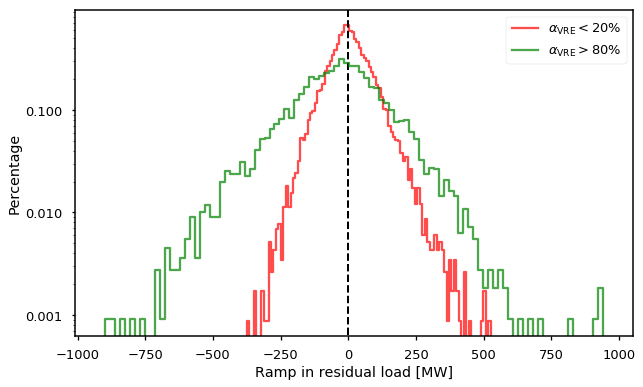

In [4]:
# Compare actual hourly steps (not iDFTs) in different epochs
ext = ''
power_cons_ob.AddHighPenetrationIndex(alpha_cuts=alpha_cuts,power_name=trp+ext)
power_cons_ob.AddHourlySteps(col_name=trp+ext,include_storms=True)
power_cons_ob.CompEpochs(col_names=[trp+ext],colors=['r','g'],alpha=0.7,\
     ls=['-','-'],compare='hourly_raw_steps',bins=100,\
    fig_name='hourly_ramps_high_low_alpha'+ext,fig_format='png',xlab='Ramp in residual load [MW]')

In [ ]:
# Variation in hourly ramps over past year
col_names = ['TotalWindPower_DK2','TotalWindPower_DK1','TotalWindPower']
time_cut = [np.datetime64('2017-10-01'),np.datetime64('2018-10-01')]
STD = power_cons_ob.GetHourlyStepSTD(time_period='year',\
    col_names=col_names,time_cut=time_cut)
STD

In [ ]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Approximate diameter of area [km]')
ax1.set_ylabel('Standard deviation [% of capacity]')
diameters =  [58, 90, 113] # see Map of wind turbines notebook
mean_STD = len(diameters)*[0]
colors=['cyan','royalblue','purple','magenta']
for _,col_name in enumerate(col_names):
    print(col_name)
    STD_cut = STD[col_name].values[np.isnan(STD[col_name]) == False]
    diameter = np.array([diameters[_]]*len(STD_cut))
    ms = list(400*(STD.index[np.isnan(STD[col_name]) == False]-2011)/(2018-2011))
    mean_STD[_] = np.mean(STD_cut)
    ax1.scatter(diameter,STD_cut,s=ms,color=colors[_],alpha=0.6,label='Hourly Ramps of ' + wp.aux.pretty_label(col_name))
# POWER LAW (optional)
# def func_powerlaw(x, m, c, c0):
#     return c0 + x**m * c
# from scipy.optimize import curve_fit
# popt, pcov = curve_fit(func_powerlaw, diameters, mean_STD)
# X = np.arange(10,150)
# ax1.plot(X, func_powerlaw(X, *popt), '--k',label='Power law fit')
# LINEAR FIT
from scipy.stats import linregress
gradient, intercept, r_value, p_value, std_err = linregress(diameters, mean_STD)
X = np.arange(10,150)
ax1.plot(X, gradient*X+intercept, ':k',label='Linear fit')
# LEGEND STUFF
handles, labels = ax1.get_legend_handles_labels()
handles = [ handles[i] for i in [1,2,3,0]]
labels = [ labels[i] for i in [1,2,3,0]]
lgnd = ax1.legend(handles=handles,labels=labels,fontsize=13)
for handle in lgnd.legendHandles[0:-2]:
    handle.set_sizes([40.0])
# plt.savefig('../../plots/std_hourly_ramps.pdf',format='pdf',dpi=300)
plt.savefig('../../plots/std_hourly_ramps.png',format='png',dpi=300)